# Compare classifiers across consensus profiles

Compare classifier metrics across different consensus profile strategies, stratefied by representations types.

In [1]:
import polars as pl 
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

preds = pl.read_parquet("./compiled_results/compiled_metrics.parquet")

cpcnn = preds.filter(pl.col("Feat_type") == "cpcnn")
dino = preds.filter(pl.col("Feat_type") == "cpcnn")
cellprofiler = preds.filter(pl.col("Feat_type") == "cpcnn")

## CPCNN

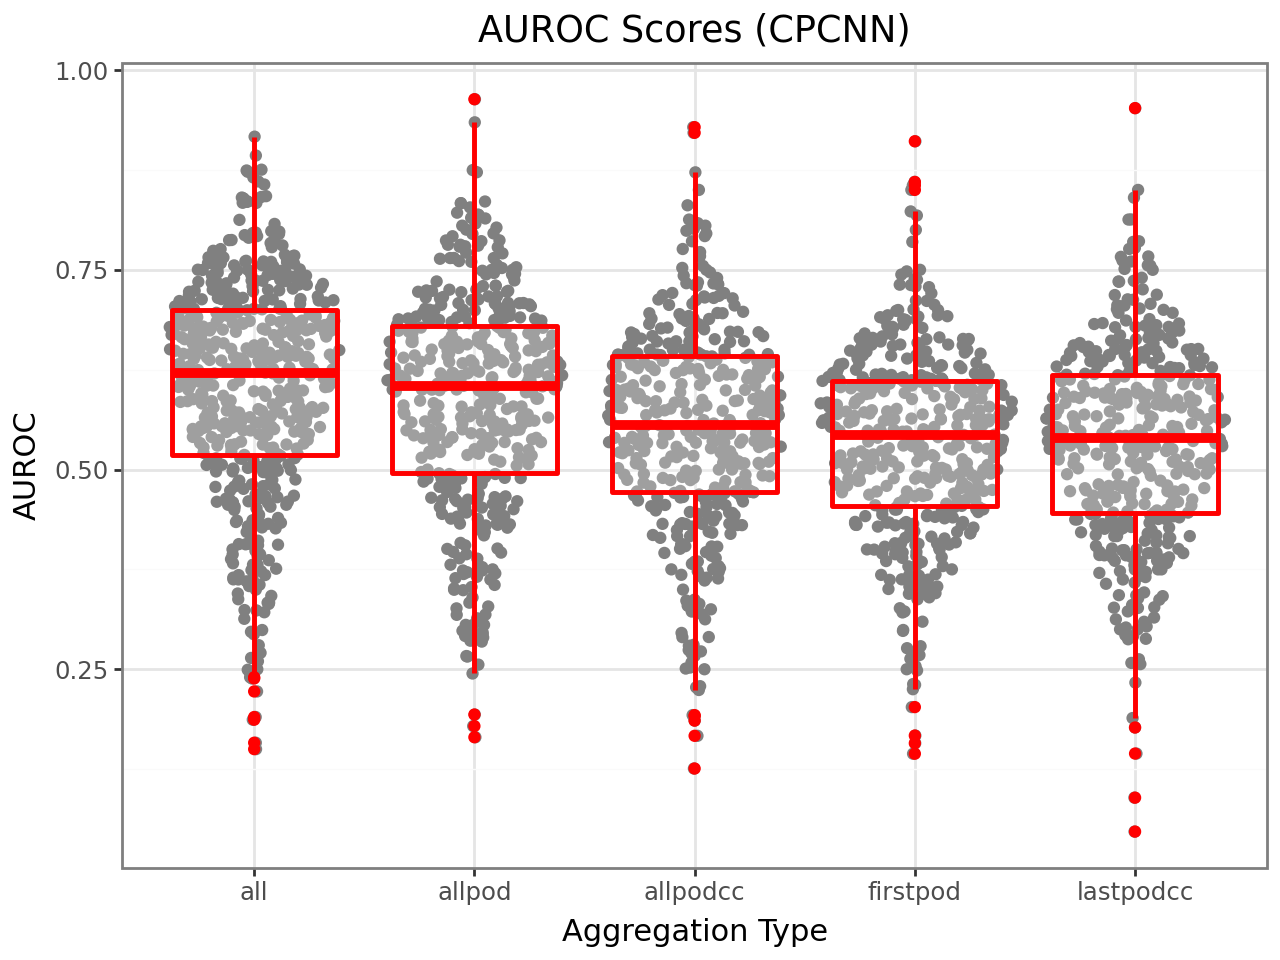

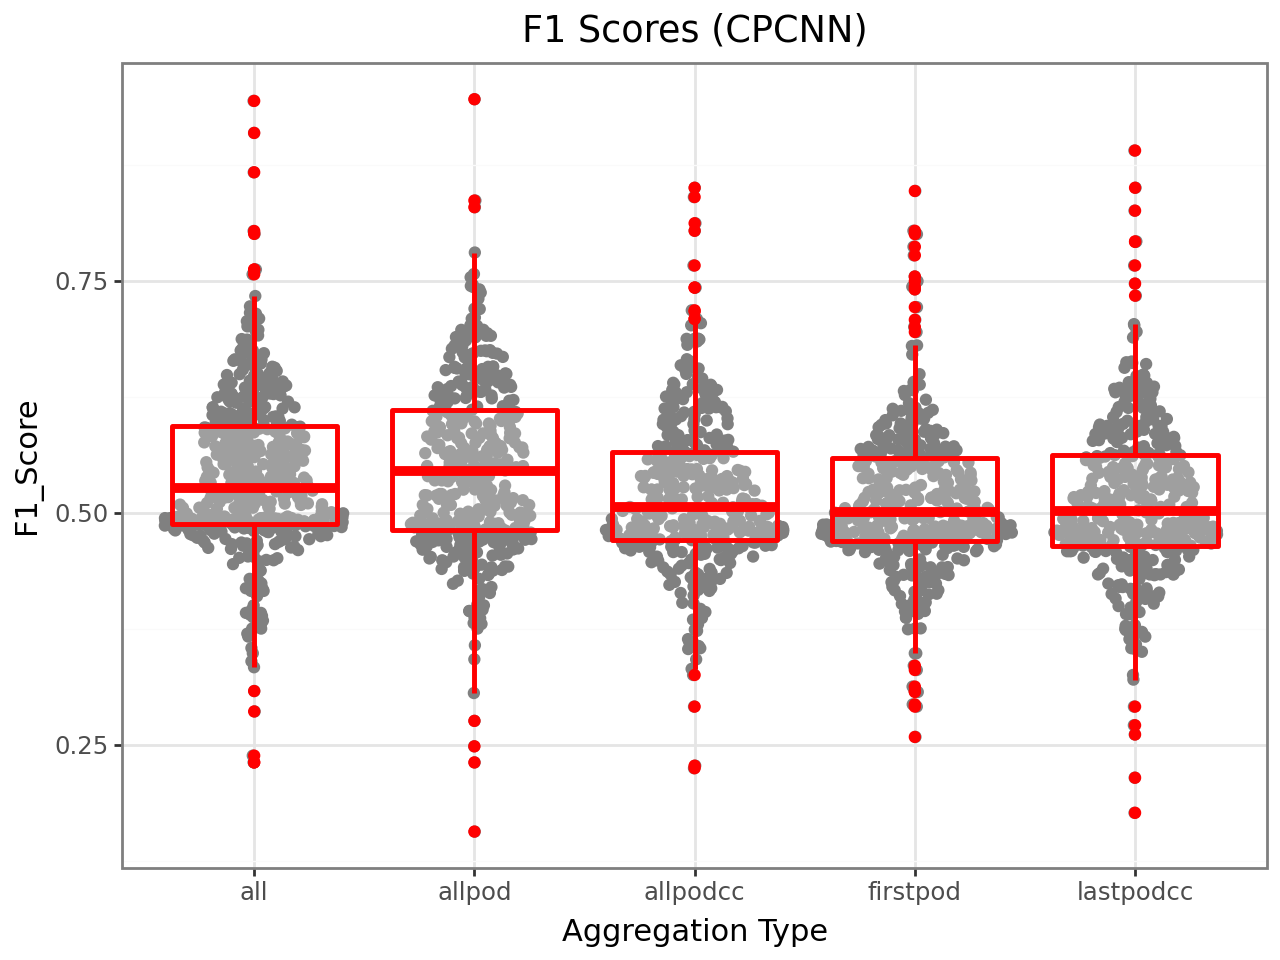

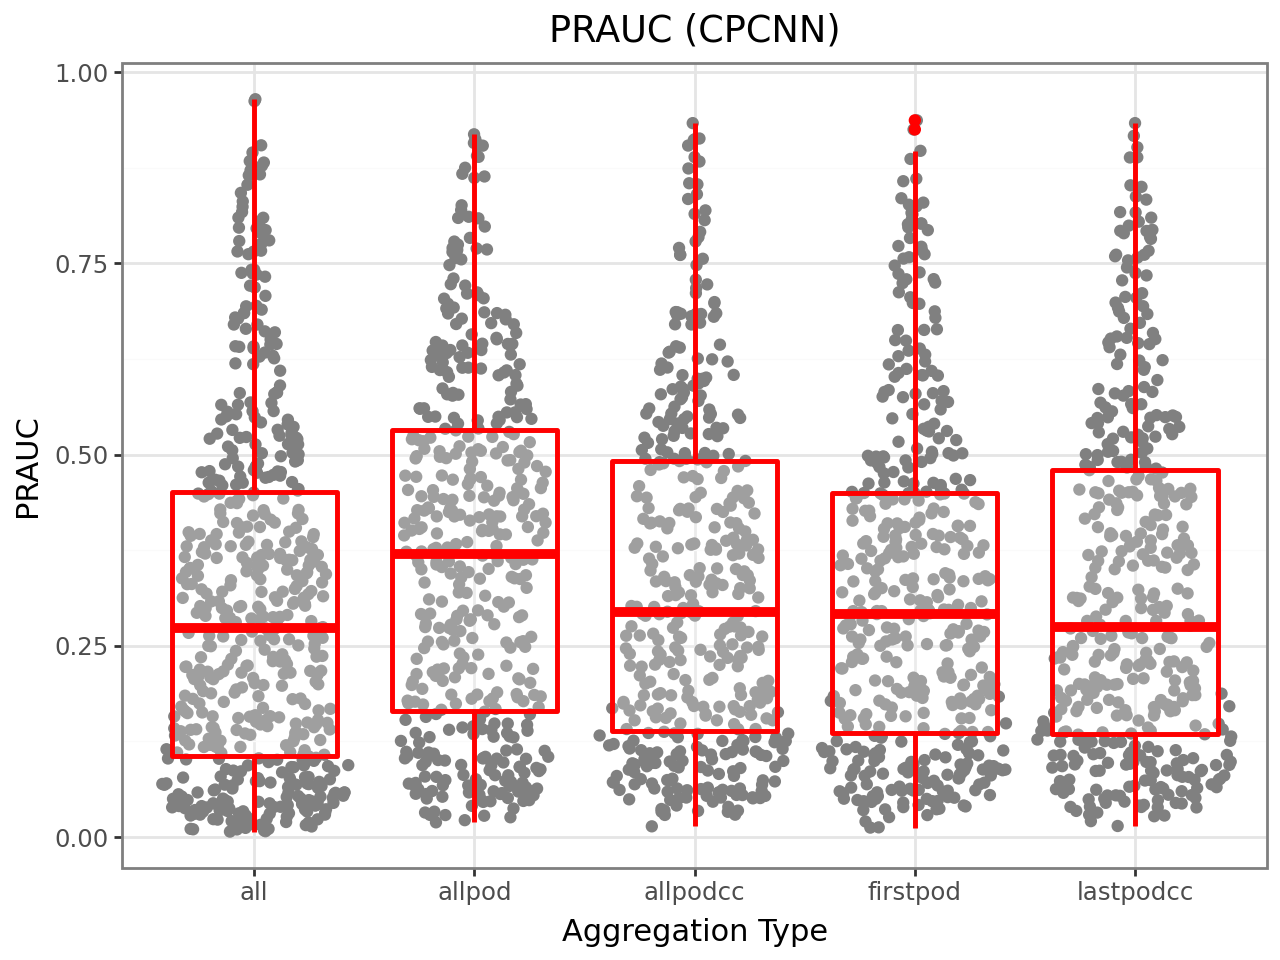

In [2]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (CPCNN)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)

plot.show()

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (CPCNN)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)

plot.show()

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (CPCNN)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)

plot.show()

## Dino

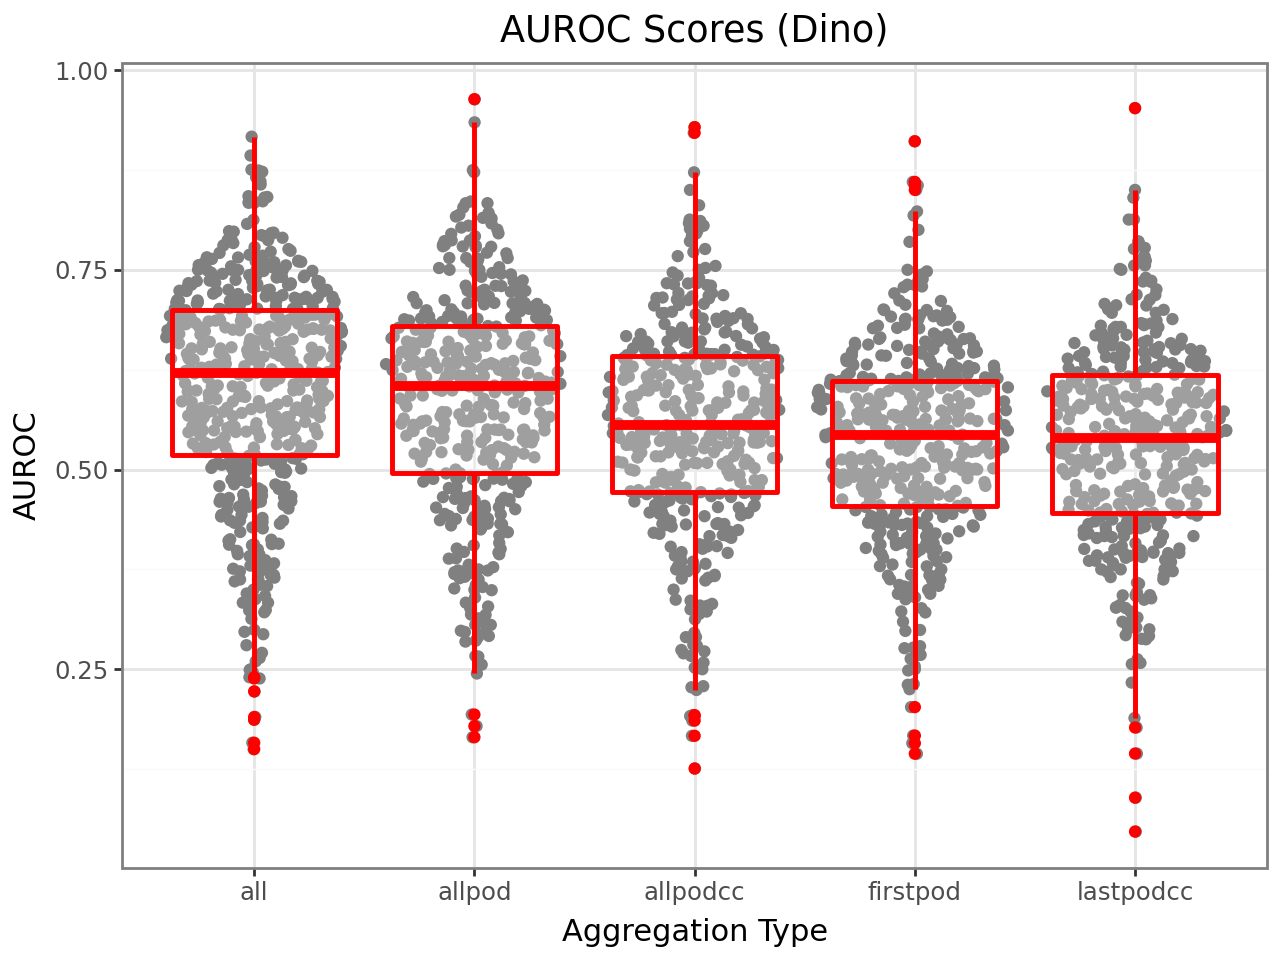

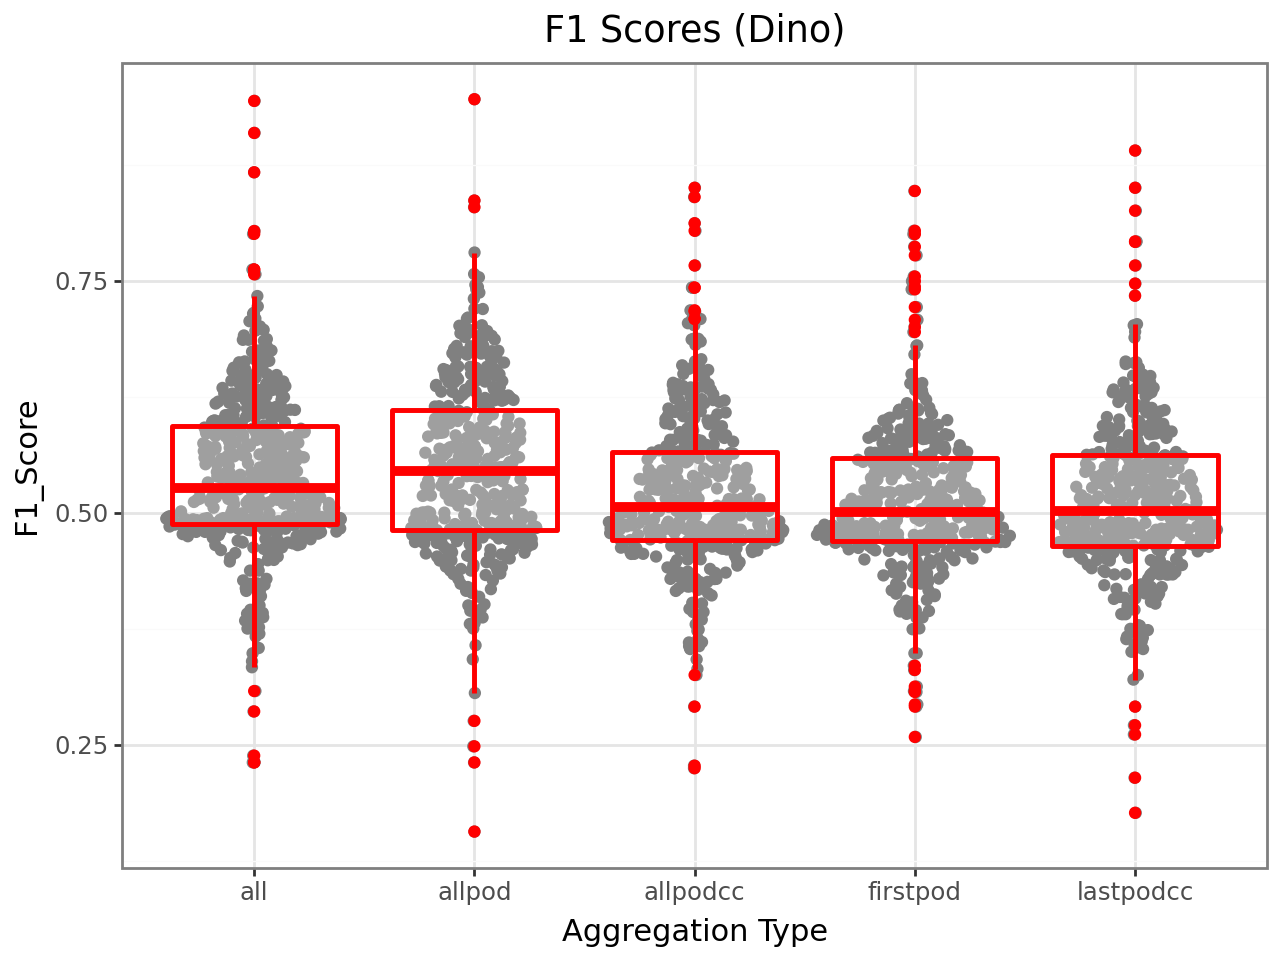

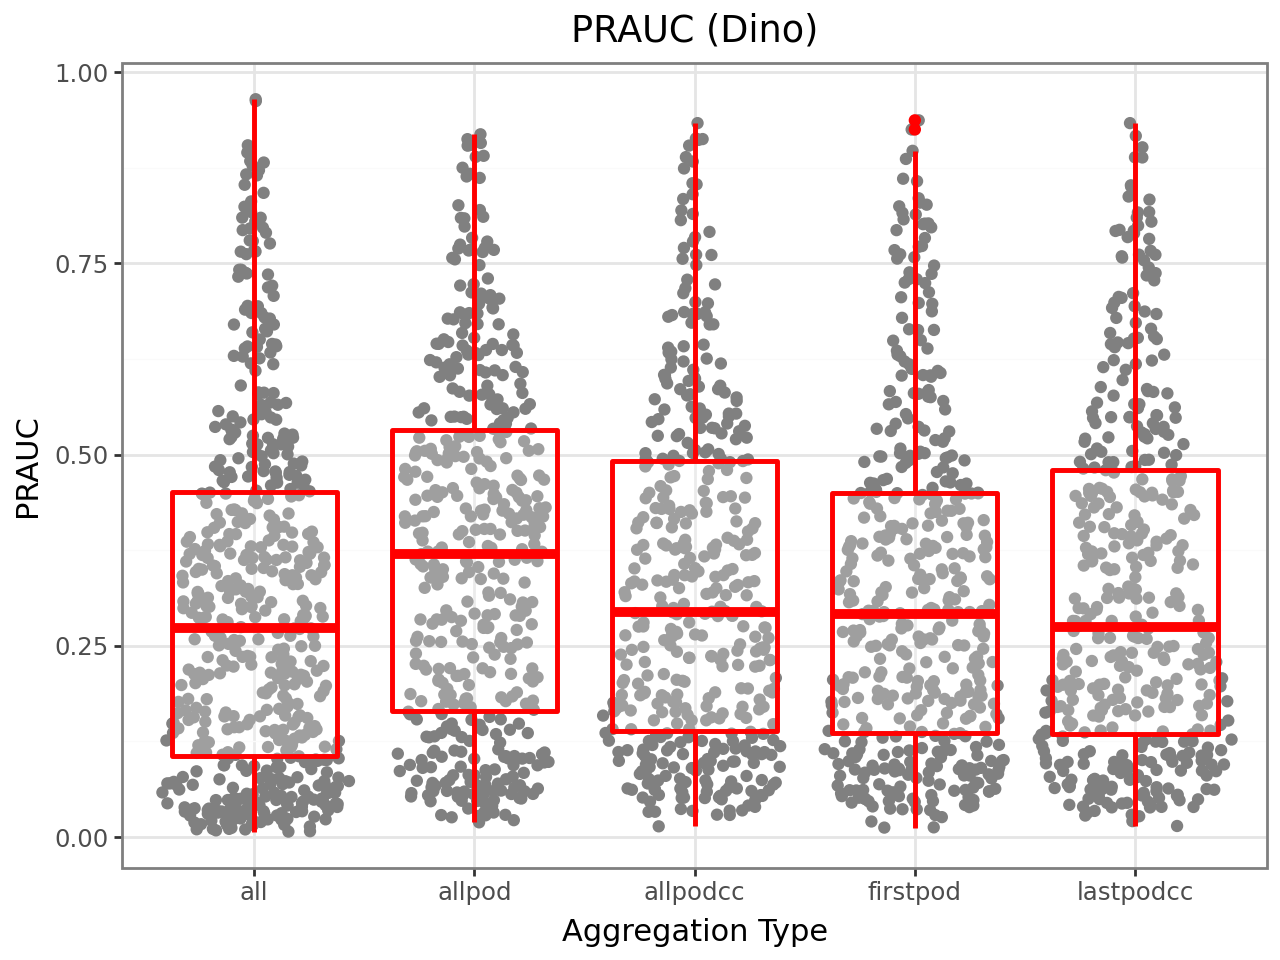

In [3]:
from plotnine import ggplot, aes, geom_boxplot, geom_sina, labs, theme_bw

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (Dino)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (Dino)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (Dino)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)
plot.show()

## CellProfiler

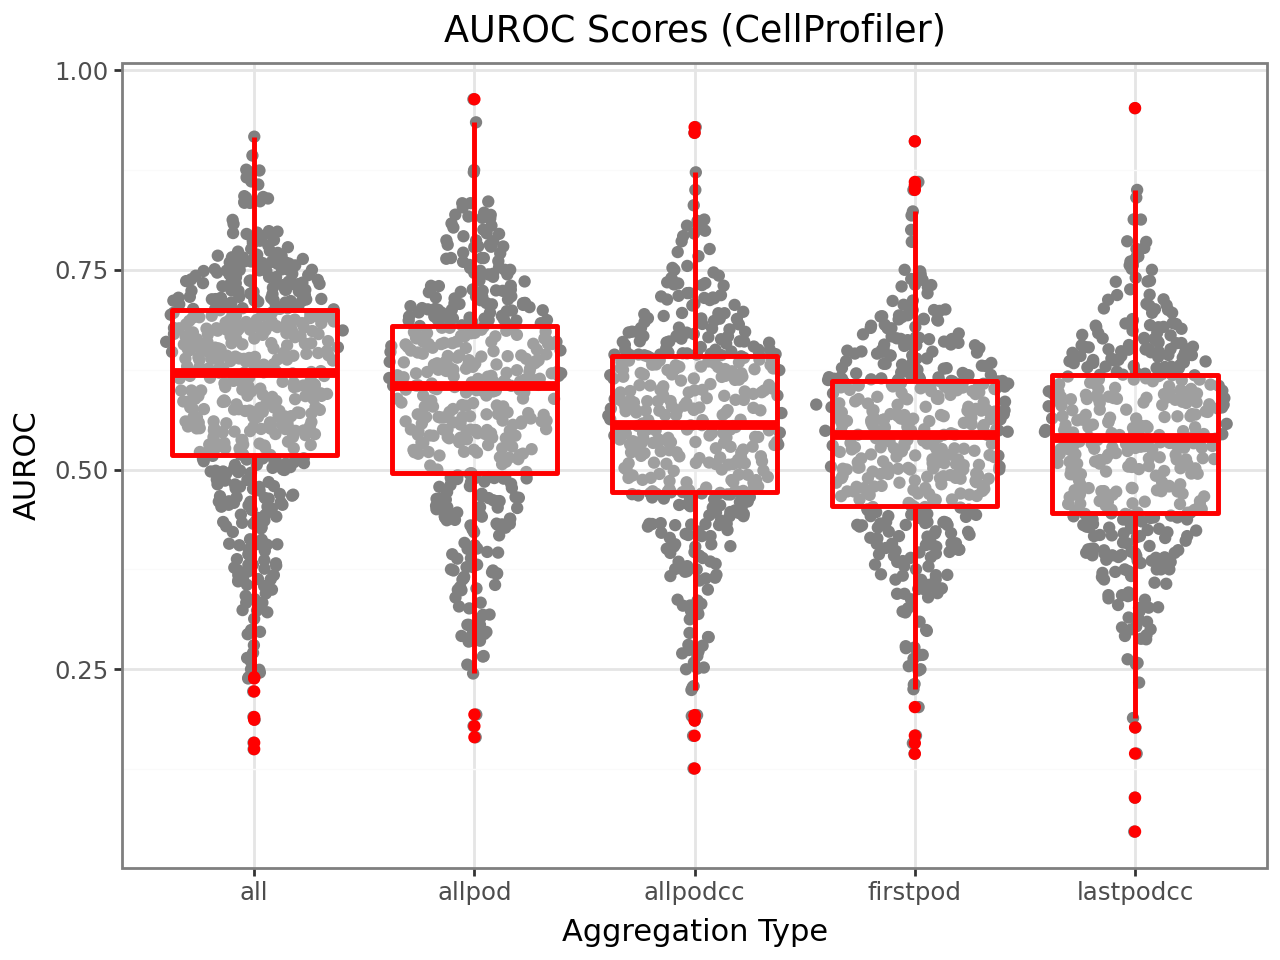

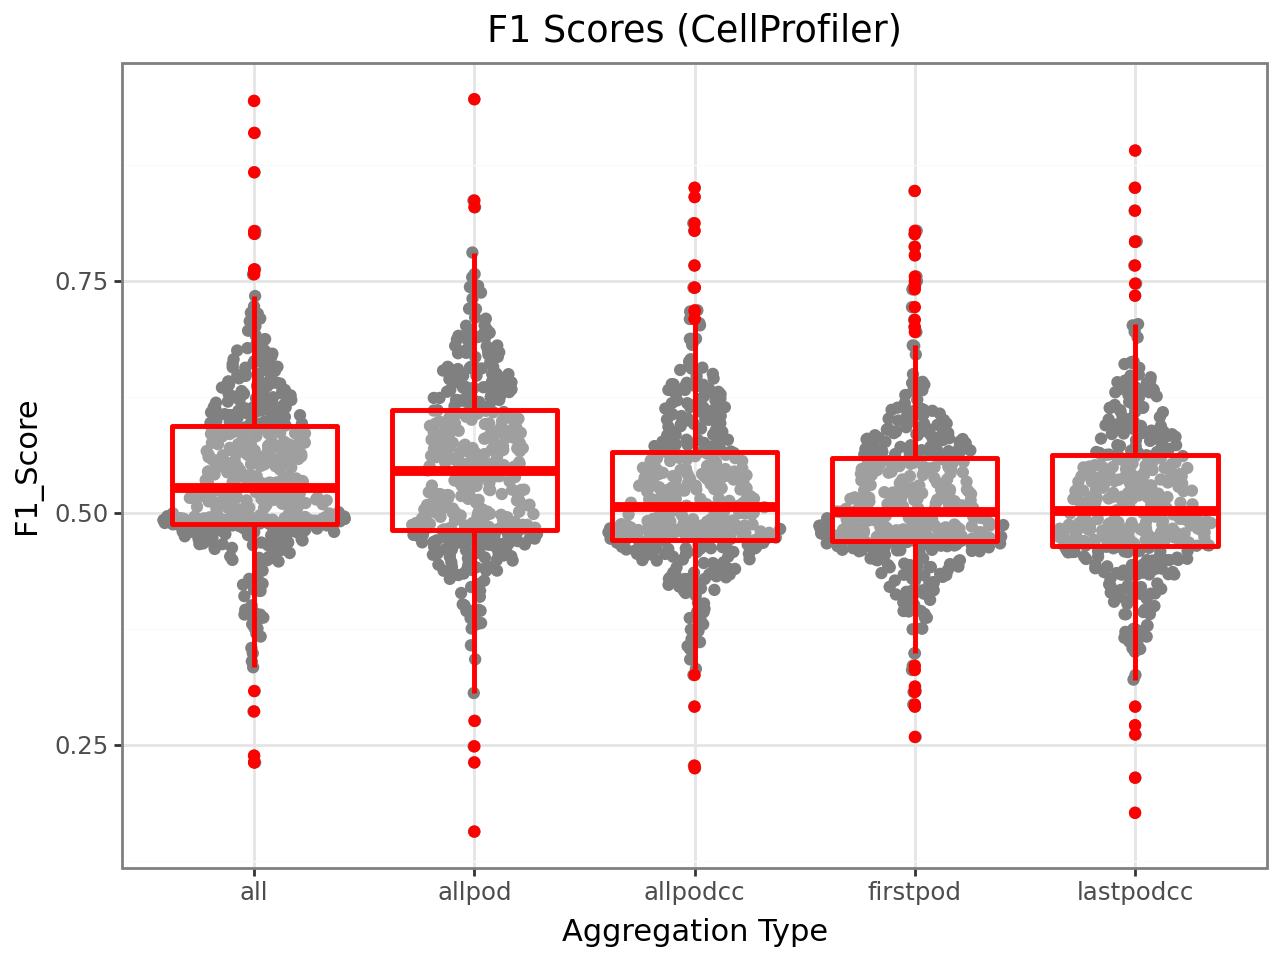

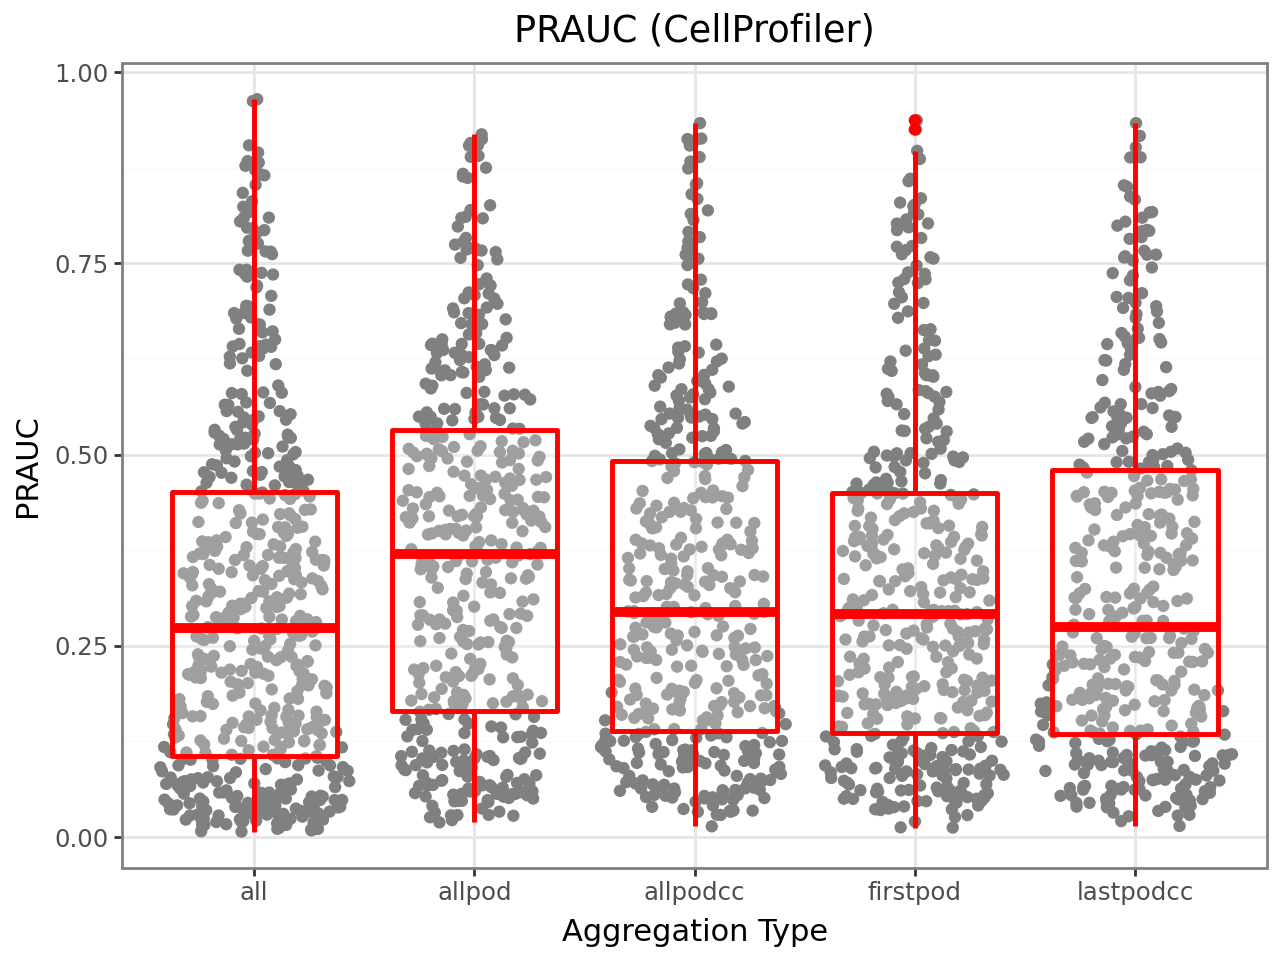

In [4]:
from plotnine import ggplot, aes, geom_boxplot, geom_sina, labs, theme_bw

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (CellProfiler)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (CellProfiler)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (CellProfiler)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)
plot.show()

## Compute statistics

In [5]:
df_pandas = preds.to_pandas()

model = smf.mixedlm("AUROC ~ Metadata_AggType", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Feat_type")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Metadata_AggType"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)


/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
     all    allpod  -0.0121    0.0 -0.0189 -0.0053   True
     all  allpodcc  -0.0591    0.0 -0.0659 -0.0522   True
     all  firstpod  -0.0698    0.0 -0.0766  -0.063   True
     all lastpodcc  -0.0577    0.0 -0.0646 -0.0509   True
  allpod  allpodcc   -0.047    0.0 -0.0541 -0.0398   True
  allpod  firstpod  -0.0577    0.0 -0.0648 -0.0506   True
  allpod lastpodcc  -0.0456    0.0 -0.0528 -0.0385   True
allpodcc  firstpod  -0.0108 0.0004 -0.0179 -0.0036   True
allpodcc lastpodcc   0.0013 0.9869 -0.0059  0.0085  False
firstpod lastpodcc   0.0121    0.0   0.005  0.0192   True
---------------------------------------------------------
[1.22259647e-05 3.46567219e-12 3.46567219e-12 3.46567219e-12
 3.46567219e-12 3.46567219e-12 3.46567219e-12 3.76681728e-04
 9.86876507e-01 3.74739549e-05]


In [6]:
df_pandas = preds.to_pandas()

model = smf.mixedlm("F1_Score ~ Metadata_AggType", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Feat_type")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Metadata_AggType"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
     all    allpod   0.0106    0.0  0.0063  0.0148   True
     all  allpodcc  -0.0238    0.0 -0.0281 -0.0196   True
     all  firstpod  -0.0282    0.0 -0.0324  -0.024   True
     all lastpodcc  -0.0222    0.0 -0.0265  -0.018   True
  allpod  allpodcc  -0.0344    0.0 -0.0388   -0.03   True
  allpod  firstpod  -0.0388    0.0 -0.0432 -0.0344   True
  allpod lastpodcc  -0.0328    0.0 -0.0372 -0.0283   True
allpodcc  firstpod  -0.0044 0.0527 -0.0088     0.0  False
allpodcc lastpodcc   0.0016 0.8596 -0.0028  0.0061  False
firstpod lastpodcc    0.006  0.002  0.0016  0.0104   True
---------------------------------------------------------
[1.03622666e-10 3.46567219e-12 3.46567219e-12 3.46567219e-12
 3.46567219e-12 3.46567219e-12 3.46567219e-12 5.27218769e-02
 8.59550577e-01 1.96443037e-03]


In [7]:
df_pandas = preds.to_pandas()

model = smf.mixedlm("PRAUC ~ Metadata_AggType", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Feat_type")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Metadata_AggType"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
     all    allpod   0.0181 0.0304  0.0011   0.035   True
     all  allpodcc  -0.0294    0.0 -0.0465 -0.0123   True
     all  firstpod  -0.0381    0.0  -0.055 -0.0211   True
     all lastpodcc  -0.0244  0.001 -0.0415 -0.0073   True
  allpod  allpodcc  -0.0475    0.0 -0.0653 -0.0297   True
  allpod  firstpod  -0.0561    0.0 -0.0738 -0.0385   True
  allpod lastpodcc  -0.0424    0.0 -0.0602 -0.0247   True
allpodcc  firstpod  -0.0087 0.6736 -0.0264  0.0091  False
allpodcc lastpodcc    0.005 0.9394 -0.0129   0.023  False
firstpod lastpodcc   0.0137 0.2184 -0.0041  0.0315  False
---------------------------------------------------------
[3.03574913e-02 2.73707636e-05 9.84197346e-09 9.73629851e-04
 6.86384283e-12 3.46589424e-12 7.67073738e-10 6.73578894e-01
 9.39385261e-01 2.18440293e-01]
